In [64]:
import numpy as np
from numpy import loadtxt
import xgboost as xgb
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [65]:
# Cargamos la base de datos

data = pd.read_csv(r"G:\Mi unidad\JuanManzano\MÁSTER INTELIGENCIA ANALÍTICA DE DATOS\ASIGNATURAS\CICLO 9\DESPLIEGUE DE SOLUCIONES ANALÍTICAS\Proyecto\processed_news_dataset.csv")

In [66]:
data

,category,date,processed_text,sentiment_text,adj_count,verb_count,noun_count,proper_noun_count,adv_count,quote_count,pattern_named_entities_count,pattern_action_phrases_count,pattern_descriptive_phrases_count,pattern_quotes_count,pattern_temporal_expressions_count,pattern_location_expressions_count
0,WORLD NEWS,2022-09-23,american roll sleeve omicron-targeted covid bo...,american roll sleeve omicron-targeted covid bo...,3,6,11,0,1,0,0,0,2,0,0,0
1,WORLD NEWS,2022-09-23,american airline flyer charge ban life punch f...,"american airline flyer charge , ban life punch...",2,8,15,0,0,0,0,2,2,0,0,0
2,COMEDY,2022-09-23,funny tweet cat dog week sept. 17-23 dog under...,funny tweet cat dog week sept. 17-23 . have do...,3,5,5,0,1,1,0,0,1,1,0,0
3,PARENTS,2022-09-23,funny tweet parent week sept. 17-23 put grown-...,funny tweet parent week sept. 17-23 . accident...,4,5,12,0,1,1,0,0,2,1,0,0
4,WORLD NEWS,2022-09-22,woman call cop black bird-watcher loses lawsui...,woman who call cop black bird-watcher loses la...,5,6,13,0,1,0,0,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207428,TECH,2012-01-28,rim ceo thorsten heins isignificant plan black...,rim ceo thorsten heins isignificant plan black...,3,6,14,0,1,0,0,2,2,0,0,0
207429,SPORTS,2012-01-28,maria sharapova stun victoria azarenka austral...,maria sharapova stun victoria azarenka austral...,5,2,12,0,1,0,0,0,0,0,0,0
207430,SPORTS,2012-01-28,giant patriot jet colt improbable super bowl u...,"giant patriot , jet colt most improbable super...",5,5,12,1,2,0,1,1,2,0,0,0
207431,SPORTS,2012-01-28,aldon smith arrest linebacker bust duo correct...,aldon smith arrest linebacker bust duo . corre...,1,3,12,0,1,0,0,0,1,0,0,0


In [72]:
cat_unicas=data['category'].unique()

In [84]:
homologacion = pd.DataFrame({'category': cat_unicas, 'categoria_numero': np.arange(27)})

In [86]:
data_homologada = pd.merge(data,homologacion,how='left',on=['category'])

In [99]:
# Definimos las variables predictoras y la variable de interés

y = data_homologada['categoria_numero']
X = data_homologada.drop(['categoria_numero', 'category', 'date', 'processed_text', 'sentiment_text'], axis=1)

In [100]:
# Separación de datos en set de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(138980, 12) (68453, 12) (138980,) (68453,)


In [101]:
# Clasificador XGB

xgb_cl = xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, seed=123)
eval_set = [(X_train, y_train), (X_test, y_test)]

In [103]:
# Ajustamos el clasificador al set de entrenamiento

xgb_cl.fit(X_train, y_train, eval_metric=["merror"], eval_set=eval_set, verbose=True)
results = xgb_cl.evals_result()

[0]	validation_0-merror:0.79185	validation_1-merror:0.79520
[1]	validation_0-merror:0.78907	validation_1-merror:0.79333
[2]	validation_0-merror:0.78691	validation_1-merror:0.79222
[3]	validation_0-merror:0.78609	validation_1-merror:0.79168
[4]	validation_0-merror:0.78503	validation_1-merror:0.79105
[5]	validation_0-merror:0.78393	validation_1-merror:0.79038
[6]	validation_0-merror:0.78322	validation_1-merror:0.79016
[7]	validation_0-merror:0.78275	validation_1-merror:0.78971
[8]	validation_0-merror:0.78177	validation_1-merror:0.78946
[9]	validation_0-merror:0.78127	validation_1-merror:0.78949
[10]	validation_0-merror:0.78045	validation_1-merror:0.78907
[11]	validation_0-merror:0.77993	validation_1-merror:0.78891
[12]	validation_0-merror:0.77926	validation_1-merror:0.78851
[13]	validation_0-merror:0.77898	validation_1-merror:0.78858
[14]	validation_0-merror:0.77834	validation_1-merror:0.78832
[15]	validation_0-merror:0.77805	validation_1-merror:0.78831
[16]	validation_0-merror:0.77751	v

In [104]:
# Predecimos las categorías del set de prueba

predictions = xgb_cl.predict(X_test)

In [105]:
# Accuracy

accuracy = float(np.sum(predictions == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

accuracy: 20.982280


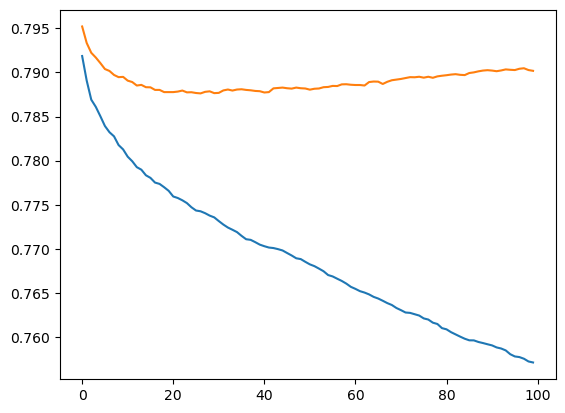

In [108]:
# plot classification error

epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')